In [1]:
import numpy as np
import torch as T
import copy
import time
import matplotlib.pyplot as plt


import Pyccat
from Pyccat import field_calculation

import Kirchhoffpy
from Kirchhoffpy.Spheical_field import spheical_grid
from Kirchhoffpy.coordinate_operations import Coord


time used: 10.329010700000005


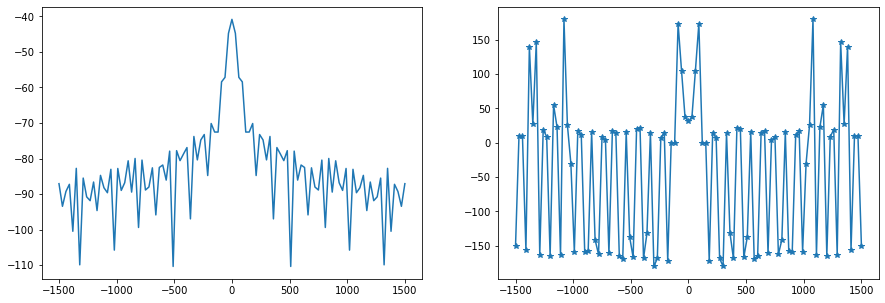

[[-7.36476322e-07 -5.01910699e-08  1.02244989e-06 ...  1.02244989e-06
  -5.01910692e-08 -7.36476326e-07]
 [-1.28122007e-06 -1.44517398e-06  1.47592286e-06 ...  1.47592286e-06
  -1.44517399e-06 -1.28122006e-06]
 [ 2.52766313e-07 -4.57800515e-07 -5.31149834e-07 ... -5.31149835e-07
  -4.57800519e-07  2.52766315e-07]
 ...
 [ 4.56443693e-07  3.81364961e-07 -8.20653955e-07 ... -8.20653955e-07
   3.81364961e-07  4.56443690e-07]
 [ 1.61427664e-07 -1.69379247e-06 -6.71380116e-07 ... -6.71380116e-07
  -1.69379247e-06  1.61427664e-07]
 [-3.10901273e-07 -2.25491301e-07  7.12100032e-07 ...  7.12100027e-07
  -2.25491302e-07 -3.10901276e-07]]
[[-2.11964585e-07 -3.61606011e-07  3.26529342e-07 ...  3.26529343e-07
  -3.61606009e-07 -2.11964584e-07]
 [ 4.16056507e-07 -4.81424456e-07 -2.18208095e-07 ... -2.18208093e-07
  -4.81424452e-07  4.16056508e-07]
 [-1.12859610e-07 -6.64309019e-08 -1.25504864e-07 ... -1.25504862e-07
  -6.64308999e-08 -1.12859610e-07]
 ...
 [-4.61442752e-07  5.07322719e-07  5.1180772

In [2]:
# define the parameters input files
inputfile='CCAT_model'
sourcefile='beam'
defocus=[0,0,700]
ad_m2=np.zeros(5*69)
ad_m1=np.zeros((5,77))
Ns=101
#source_field=spheical_grid(-0.005,0.005,-0.005,0.005,Ns,Ns,distance=300*10**3)
source=Coord()
source0=np.genfromtxt(sourcefile+'/on-axis.txt',delimiter=',')
source.x=source0[...,0];source.y=source0[...,1];source.z=source0[...,2]
Field_s,Field_fimag,Field_m1,Field_m2=field_calculation(inputfile,source,defocus,ad_m2,ad_m1)
S=(Field_s.real+1j*Field_s.imag).reshape(Ns,Ns)

beam=S
x=source.x.reshape(Ns,-1)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
cmap='jet'
p1=axs[0].plot(x[50,:],20*np.log10(np.abs(beam[50,:])))
p2=axs[1].plot(x[50,:],np.angle(beam[50,:])*180/np.pi,'*-')
plt.show()

print(beam.real)
print(beam.imag)

time used: 27.7443382


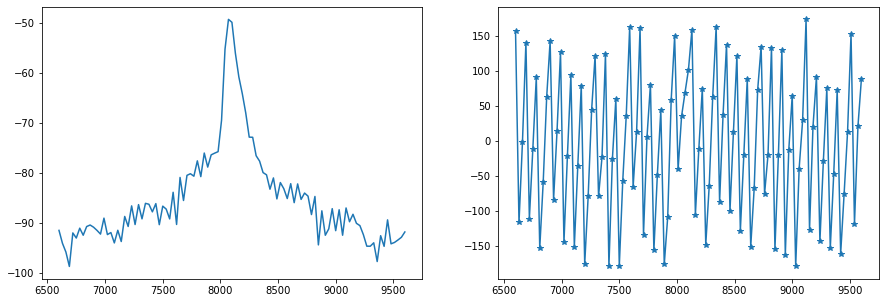

[[ 3.68879386e-07 -1.40536680e-07 -3.45567955e-07 ... -1.55612909e-06
  -5.00861678e-07  1.51715582e-06]
 [-8.34943111e-08 -4.11619223e-07 -4.45055790e-07 ...  3.37695145e-07
  -7.81140944e-07 -6.23802770e-07]
 [-1.86944164e-07  8.11715249e-07  4.52009678e-07 ...  1.42098969e-06
  -1.00518817e-07 -1.60205990e-06]
 ...
 [-3.93269385e-07  7.17617238e-07  6.16273749e-07 ...  4.50390905e-07
   4.55006586e-07 -3.07236641e-07]
 [-6.52450481e-07 -4.30804783e-07  3.75283229e-07 ... -1.78827347e-07
   2.11744525e-07 -1.90734944e-07]
 [-1.74409975e-07 -6.49559212e-07 -5.89334381e-08 ... -3.98351969e-07
  -2.22972952e-07  5.24624286e-07]]
[[-7.89610063e-07 -1.14656490e-07  6.21272312e-07 ...  4.18321699e-07
   1.49400040e-06  4.31645067e-07]
 [-5.82671911e-07 -6.85489231e-08  5.07745376e-07 ... -5.08953359e-07
   3.05798109e-07  1.68151277e-07]
 [ 9.31960232e-07  9.16075702e-08 -6.38309682e-07 ... -1.23595204e-06
  -1.39235761e-06  5.01945479e-11]
 ...
 [ 7.70477913e-07  1.19376928e-06 -2.9823198

In [3]:
# define the parameters input files
inputfile='CCAT_model'
sourcefile='beam'
defocus=[400,400,700]
ad_m2=np.zeros(5*69)
ad_m1=np.zeros((5,77))
Ns=101
#source_field=spheical_grid(-0.005,0.005,-0.005,0.005,Ns,Ns,distance=300*10**3)
source=Coord()
source0=np.genfromtxt(sourcefile+'/'+str(defocus[0])+'_'+str(defocus[1])+'_600'+'.txt')
source.x=source0[...,0];source.y=source0[...,1];source.z=source0[...,2]
Field_s,Field_fimag,Field_m1,Field_m2=field_calculation(inputfile,source,defocus,ad_m2,ad_m1)
S1=(Field_s.real+1j*Field_s.imag).reshape(Ns,Ns)

beam=S1
x=source.x.reshape(Ns,-1)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
cmap='jet'
p1=axs[0].plot(x[50,:],20*np.log10(np.abs(beam[50,:])))
p2=axs[1].plot(x[50,:],np.angle(beam[50,:])*180/np.pi,'*-')
plt.show()

print(beam.real)
print(beam.imag)

time used: 28.254195200000005


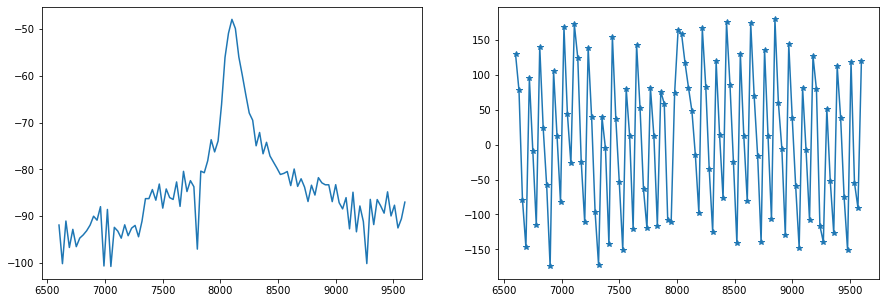

[[ 4.78187939e-07  5.37517692e-08 -1.62002544e-07 ... -7.07410679e-07
   3.06017437e-07  8.80100353e-07]
 [ 4.08928435e-07 -5.34844936e-08 -9.53830770e-07 ...  6.41572076e-08
  -4.67315987e-08  2.94942129e-07]
 [-2.65518375e-08 -2.04201223e-08 -4.04163936e-07 ...  1.29232462e-06
  -2.84680330e-07 -1.26122156e-06]
 ...
 [ 1.36222923e-06  2.77245716e-07 -9.26471925e-07 ... -1.44095392e-06
  -5.86039354e-07  1.96548385e-06]
 [ 2.39449451e-07 -4.64527433e-07  3.87012144e-07 ... -2.58799083e-08
  -3.11802080e-07  4.54271108e-07]
 [-9.55832539e-07 -2.99205327e-07  8.13728873e-07 ...  9.28240674e-07
   6.87759238e-07 -1.43836392e-06]]
[[ 5.51468888e-07 -5.78274426e-07 -7.31321678e-07 ...  6.76390312e-07
  -3.35568786e-07 -1.55663488e-08]
 [-6.52337551e-07  6.36469584e-07  5.42958370e-07 ...  1.49721031e-06
   6.86297874e-07 -7.01288748e-07]
 [-7.42169966e-07  9.17613697e-07  8.11829319e-07 ... -2.73318831e-07
   2.10706465e-07 -4.57102100e-07]
 ...
 [-1.93839517e-07 -2.42992089e-07  1.2695487

In [4]:
# define the parameters input files
inputfile='CCAT_model'
sourcefile='beam'
defocus=[400,-400,700]
ad_m2=np.zeros(5*69)
ad_m1=np.zeros((5,77))
Ns=101
#source_field=spheical_grid(-0.005,0.005,-0.005,0.005,Ns,Ns,distance=300*10**3)
source=Coord()
source0=np.genfromtxt(sourcefile+'/'+str(defocus[0])+'_'+str(defocus[1])+'_600'+'.txt')
source.x=source0[...,0];source.y=source0[...,1];source.z=source0[...,2]
Field_s,Field_fimag,Field_m1,Field_m2=field_calculation(inputfile,source,defocus,ad_m2,ad_m1)
S2=(Field_s.real+1j*Field_s.imag).reshape(Ns,Ns)

beam=S2
x=source.x.reshape(Ns,-1)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
cmap='jet'
p1=axs[0].plot(x[50,:],20*np.log10(np.abs(beam[50,:])))
p2=axs[1].plot(x[50,:],np.angle(beam[50,:])*180/np.pi,'*-')
plt.show()

print(beam.real)
print(beam.imag)

time used: 28.22203040000001


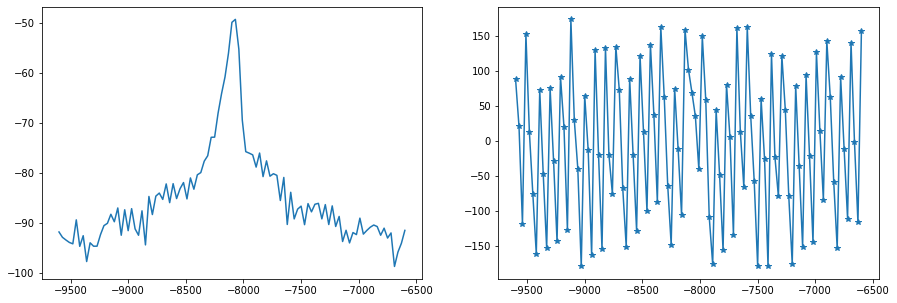

[[ 1.51715582e-06 -5.00861680e-07 -1.55612909e-06 ... -3.45567964e-07
  -1.40536678e-07  3.68879388e-07]
 [-6.23802772e-07 -7.81140946e-07  3.37695147e-07 ... -4.45055779e-07
  -4.11619221e-07 -8.34943151e-08]
 [-1.60205990e-06 -1.00518815e-07  1.42098968e-06 ...  4.52009680e-07
   8.11715253e-07 -1.86944164e-07]
 ...
 [-3.07236642e-07  4.55006587e-07  4.50390903e-07 ...  6.16273753e-07
   7.17617238e-07 -3.93269380e-07]
 [-1.90734940e-07  2.11744527e-07 -1.78827341e-07 ...  3.75283226e-07
  -4.30804781e-07 -6.52450474e-07]
 [ 5.24624277e-07 -2.22972951e-07 -3.98351966e-07 ... -5.89334365e-08
  -6.49559205e-07 -1.74409973e-07]]
[[ 4.31645066e-07  1.49400040e-06  4.18321698e-07 ...  6.21272311e-07
  -1.14656489e-07 -7.89610064e-07]
 [ 1.68151274e-07  3.05798115e-07 -5.08953358e-07 ...  5.07745374e-07
  -6.85489304e-08 -5.82671902e-07]
 [ 5.01893720e-11 -1.39235762e-06 -1.23595205e-06 ... -6.38309685e-07
   9.16075702e-08  9.31960231e-07]
 ...
 [-2.68812089e-07 -1.95984588e-07  1.3081626

In [5]:
# define the parameters input files
inputfile='CCAT_model'
sourcefile='beam'
defocus=[-400,400,700]
ad_m2=np.zeros(5*69)
ad_m1=np.zeros((5,77))
Ns=101
#source_field=spheical_grid(-0.005,0.005,-0.005,0.005,Ns,Ns,distance=300*10**3)
source=Coord()
source0=np.genfromtxt(sourcefile+'/'+str(defocus[0])+'_'+str(defocus[1])+'_600'+'.txt')
source.x=source0[...,0];source.y=source0[...,1];source.z=source0[...,2]
Field_s,Field_fimag,Field_m1,Field_m2=field_calculation(inputfile,source,defocus,ad_m2,ad_m1)
S3=(Field_s.real+1j*Field_s.imag).reshape(Ns,Ns)

beam=S3
x=source.x.reshape(Ns,-1)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
cmap='jet'
p1=axs[0].plot(x[50,:],20*np.log10(np.abs(beam[50,:])))
p2=axs[1].plot(x[50,:],np.angle(beam[50,:])*180/np.pi,'*-')
plt.show()

print(beam.real)
print(beam.imag)

time used: 28.377136199999995


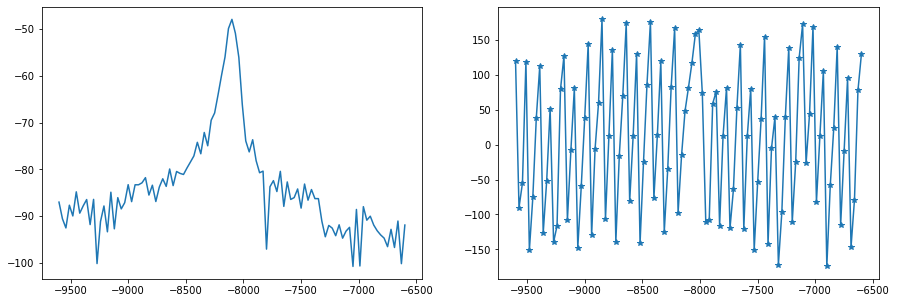

[[ 8.80100358e-07  3.06017435e-07 -7.07410679e-07 ... -1.62002546e-07
   5.37517641e-08  4.78187940e-07]
 [ 2.94942131e-07 -4.67315959e-08  6.41572131e-08 ... -9.53830767e-07
  -5.34844933e-08  4.08928431e-07]
 [-1.26122156e-06 -2.84680328e-07  1.29232462e-06 ... -4.04163935e-07
  -2.04201245e-08 -2.65518322e-08]
 ...
 [ 1.96548385e-06 -5.86039361e-07 -1.44095392e-06 ... -9.26471928e-07
   2.77245719e-07  1.36222923e-06]
 [ 4.54271107e-07 -3.11802084e-07 -2.58799053e-08 ...  3.87012140e-07
  -4.64527435e-07  2.39449445e-07]
 [-1.43836391e-06  6.87759244e-07  9.28240671e-07 ...  8.13728876e-07
  -2.99205325e-07 -9.55832542e-07]]
[[-1.55663518e-08 -3.35568793e-07  6.76390307e-07 ... -7.31321675e-07
  -5.78274429e-07  5.51468881e-07]
 [-7.01288757e-07  6.86297877e-07  1.49721031e-06 ...  5.42958370e-07
   6.36469586e-07 -6.52337550e-07]
 [-4.57102100e-07  2.10706471e-07 -2.73318837e-07 ...  8.11829319e-07
   9.17613694e-07 -7.42169970e-07]
 ...
 [-5.14532932e-08  9.06975978e-07  4.5882612

In [6]:
# define the parameters input files
inputfile='CCAT_model'
sourcefile='beam'
defocus=[-400,-400,700]
ad_m2=np.zeros(5*69)
ad_m1=np.zeros((5,77))
Ns=101
#source_field=spheical_grid(-0.005,0.005,-0.005,0.005,Ns,Ns,distance=300*10**3)
source=Coord()
source0=np.genfromtxt(sourcefile+'/'+str(defocus[0])+'_'+str(defocus[1])+'_600'+'.txt')
source.x=source0[...,0];source.y=source0[...,1];source.z=source0[...,2]
Field_s,Field_fimag,Field_m1,Field_m2=field_calculation(inputfile,source,defocus,ad_m2,ad_m1)
S4=(Field_s.real+1j*Field_s.imag).reshape(Ns,Ns)

beam=S4
x=source.x.reshape(Ns,-1)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
cmap='jet'
p1=axs[0].plot(x[50,:],20*np.log10(np.abs(beam[50,:])))
p2=axs[1].plot(x[50,:],np.angle(beam[50,:])*180/np.pi,'*-')
plt.show()

print(beam.real)
print(beam.imag)